<a href="https://colab.research.google.com/github/09sravyareddy/DDquiz/blob/main/quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import torch

In [12]:
def plot_decompose(decompose_result):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,20))
    decompose_result.observed.plot(legend=False,ax=ax1,fontsize = 20,grid=True,linewidth = 3)
    ax1.set_ylabel("Observed",fontsize = 20)
    decompose_result.trend.plot(legend=False,ax=ax2,fontsize = 20,grid=True,linewidth = 3)
    ax2.set_ylabel("Trend",fontsize = 20)
    decompose_result.seasonal.plot(legend=False,ax=ax3,fontsize = 20,grid=True,linewidth = 3)
    ax3.set_ylabel("Seasonal",fontsize = 20)
    decompose_result.resid.plot(legend=False,ax=ax4,fontsize = 20,grid=True,linewidth = 3)
    ax4.set_ylabel("Residual",fontsize = 20)

In [44]:

flight_data = pd.read_csv('/content/AirPassengers.csv')
cm = sns.light_palette("green", as_cmap=True)
flight_data.head(20).style.background_gradient(cmap=cm)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [14]:
print(flight_data.describe())
print('-'*50)
print(flight_data.tail())

       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000
--------------------------------------------------
       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [15]:
flight_data.shape

(144, 2)

In [16]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


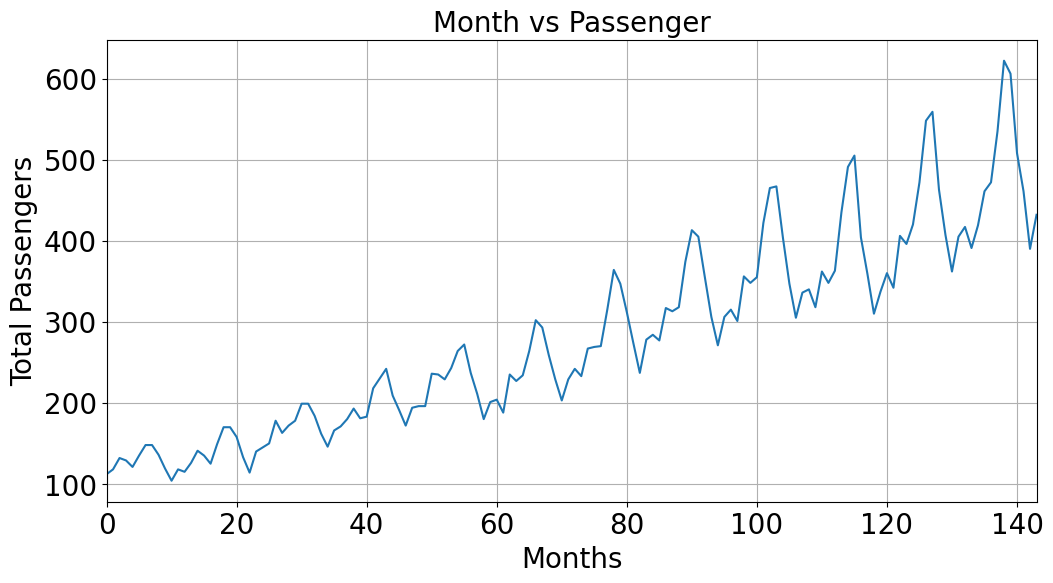

In [17]:
plt.figure(figsize=(12,6))
plt.title('Month vs Passenger',fontsize = 20)
plt.ylabel('Total Passengers',fontsize = 20)
plt.xlabel('Months',fontsize = 20)
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(flight_data['#Passengers'])

In [18]:
flight_data['#Passengers']

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

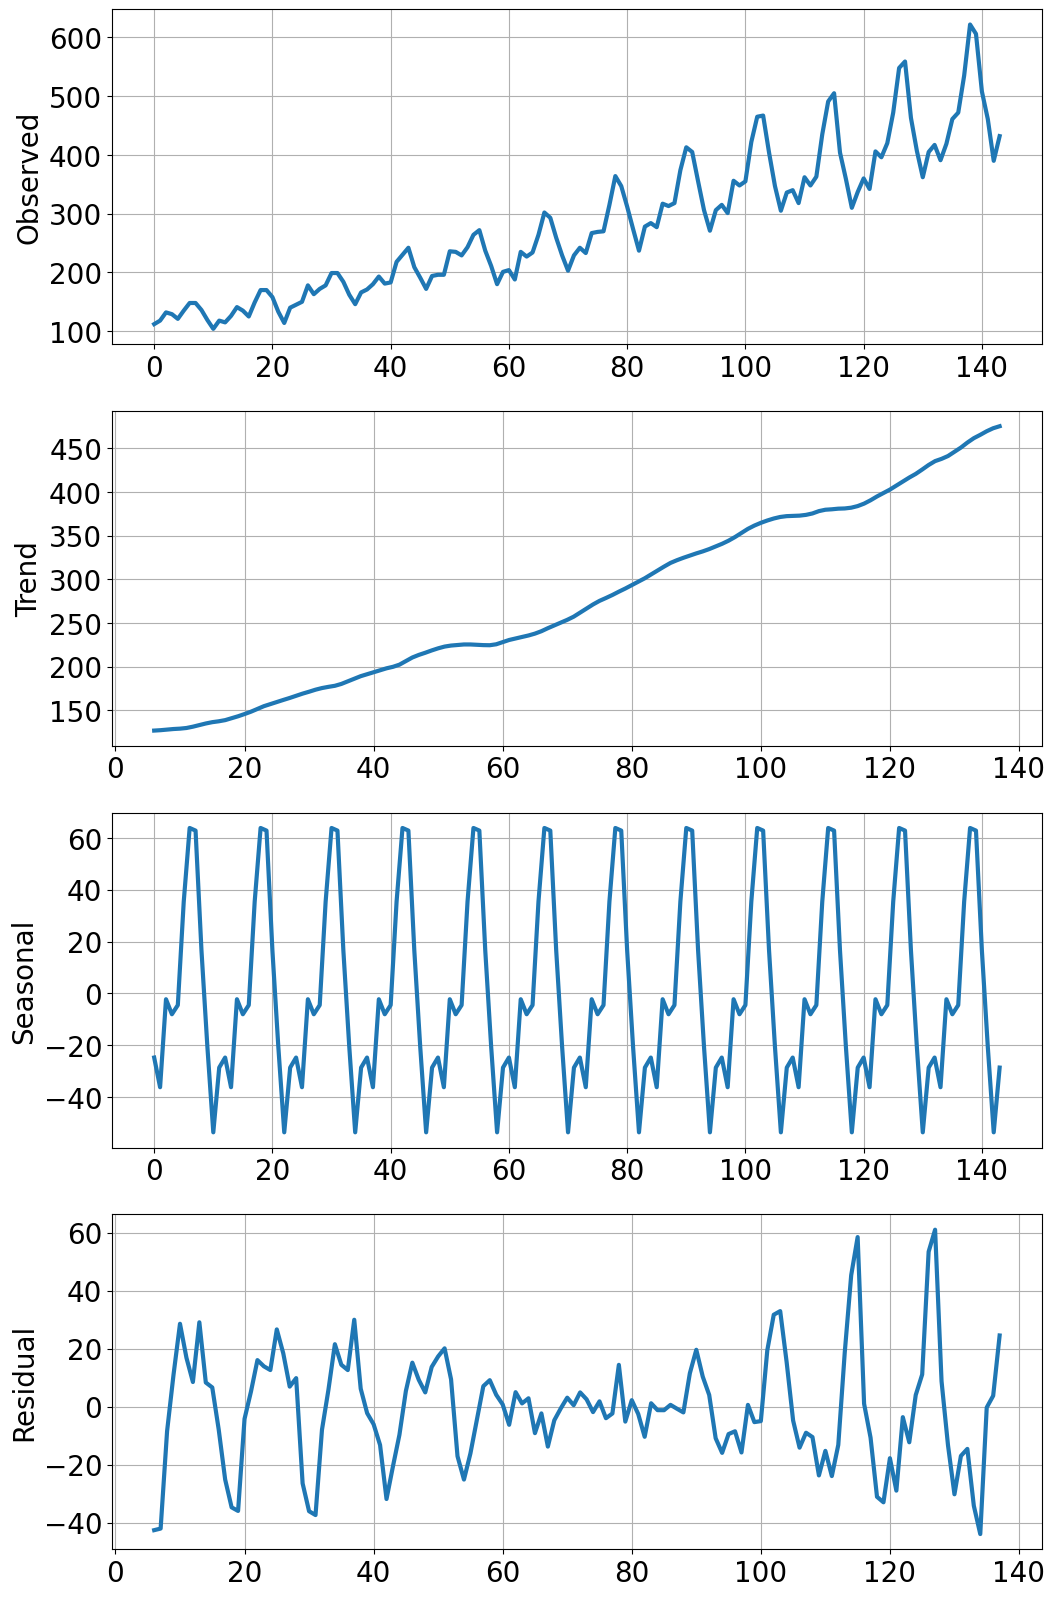

In [19]:
# decompose time series data into Trend, Seasonality, and Residual through time series decomposition.
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(flight_data['#Passengers'], period=12)
plot_decompose(decomposition)

In [20]:
#preprocessing
all_data = flight_data['#Passengers'].values.astype(float)
print(all_data)

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


In [21]:
test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]
print(len(train_data))
print(len(test_data))

132
12


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [23]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [24]:
#This function returns a tuple by transforming the raw input data into sequence data to fit training. The number of passengers traveling in the first 12 months predicts the number of passengers in 13 months.

#The first value in tuple: sequence of passengers in 12 months (=features)

#The second value of the tuple: the number of passengers predicted as the number of passengers in 12 months (=target)
train_window = 12

In [25]:
def create_inout_sequences(input_data, window):
    inout_seq = []
    L = len(input_data)
    for i in range(L-window):
        train_seq = input_data[i:i+window]
        train_label = input_data[i+window:i+window+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [26]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [27]:
train_inout_seq[:5]

[(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
          -0.8593, -0.9341, -1.0000, -0.9385]),
  tensor([-0.9516])),
 (tensor([-0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593,
          -0.9341, -1.0000, -0.9385, -0.9516]),
  tensor([-0.9033])),
 (tensor([-0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341,
          -1.0000, -0.9385, -0.9516, -0.9033]),
  tensor([-0.8374])),
 (tensor([-0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000,
          -0.9385, -0.9516, -0.9033, -0.8374]),
  tensor([-0.8637])),
 (tensor([-0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385,
          -0.9516, -0.9033, -0.8374, -0.8637]),
  tensor([-0.9077]))]

In [32]:
epochs = 500

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

epoch:   1 loss: 0.00003215
epoch:  26 loss: 0.27788627
epoch:  51 loss: 0.25088453
epoch:  76 loss: 0.25743616
epoch: 101 loss: 0.25683543
epoch: 126 loss: 0.25981712
epoch: 151 loss: 0.00029396
epoch: 176 loss: 0.00383213
epoch: 201 loss: 0.00486605
epoch: 226 loss: 0.00981898
epoch: 251 loss: 0.00060687
epoch: 276 loss: 0.00013872
epoch: 301 loss: 0.00196971
epoch: 326 loss: 0.00184184
epoch: 351 loss: 0.00175095
epoch: 376 loss: 0.00058800
epoch: 401 loss: 0.00077992
epoch: 426 loss: 0.00018988
epoch: 451 loss: 0.00000171
epoch: 476 loss: 0.00132549
epoch: 499 loss: 0.00002912


In [33]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.12527473270893097, 0.04615384712815285, 0.3274725377559662, 0.2835164964199066, 0.3890109956264496, 0.6175824403762817, 0.9516483545303345, 1.0, 0.5780220031738281, 0.33186814188957214, 0.13406594097614288, 0.32307693362236023]


In [34]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        test_inputs.append(model(seq).item())

In [35]:
test_inputs[fut_pred:]

[0.46945780515670776,
 0.5873366594314575,
 0.7684829831123352,
 1.0332303047180176,
 1.2110800743103027,
 1.22491455078125,
 1.110198974609375,
 1.0403640270233154,
 1.1012537479400635,
 1.1739027500152588,
 1.1821763515472412,
 1.1941204071044922]

In [36]:
#transform the normalized predicted values into the actual predicted values. Use the inverse_transform of the min/max scaler object you used to normalize the data set to transform it to its original value.
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[438.30165067]
 [465.11909002]
 [506.32987866]
 [566.55989432]
 [607.02071691]
 [610.1680603 ]
 [584.07026672]
 [568.18281615]
 [582.03522766]
 [598.56287563]
 [600.44511998]
 [603.16239262]]


In [37]:
x = np.arange(132, 144, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143]


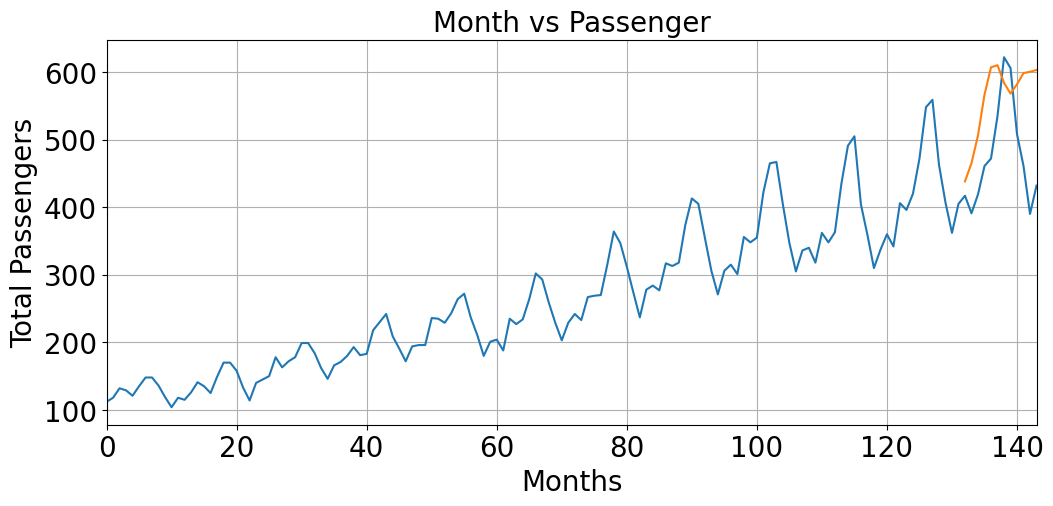

In [38]:
#LSTM prediction is orange line

plt.figure(figsize=(12,5))
plt.title('Month vs Passenger',fontsize = 20)
plt.ylabel('Total Passengers',fontsize = 20)
plt.xlabel('Months',fontsize = 20)
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(flight_data['#Passengers'])
plt.plot(x,actual_predictions)

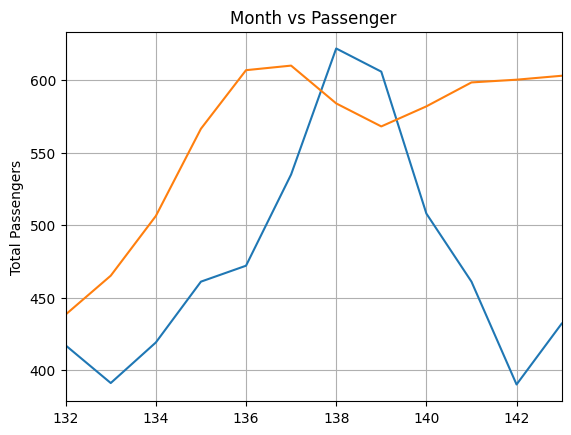

In [39]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(flight_data['#Passengers'][-train_window:])
plt.plot(x,actual_predictions)
plt.show()

In [41]:
flight_data['#Passengers'][:-train_window]
train_df = pd.DataFrame(flight_data['#Passengers'][:-train_window])
actual_df = pd.DataFrame(actual_predictions)
actual_df.columns = ['#Passengers']
new_predict = pd.concat([train_df,actual_df]).reset_index(drop=True)

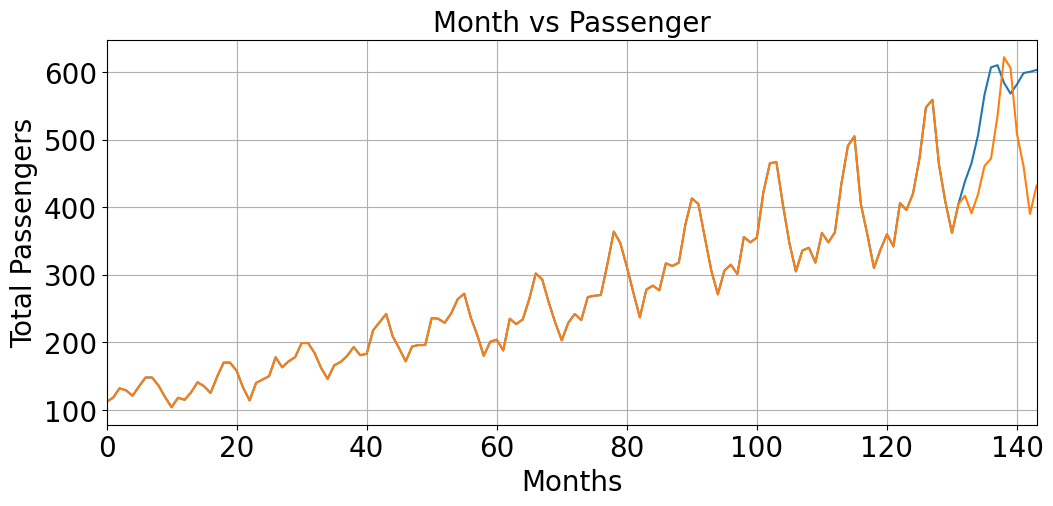

In [42]:
plt.figure(figsize=(12,5))
plt.title('Month vs Passenger',fontsize = 20)
plt.ylabel('Total Passengers',fontsize = 20)
plt.xlabel('Months',fontsize = 20)
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(new_predict)
plt.plot(flight_data['#Passengers'])

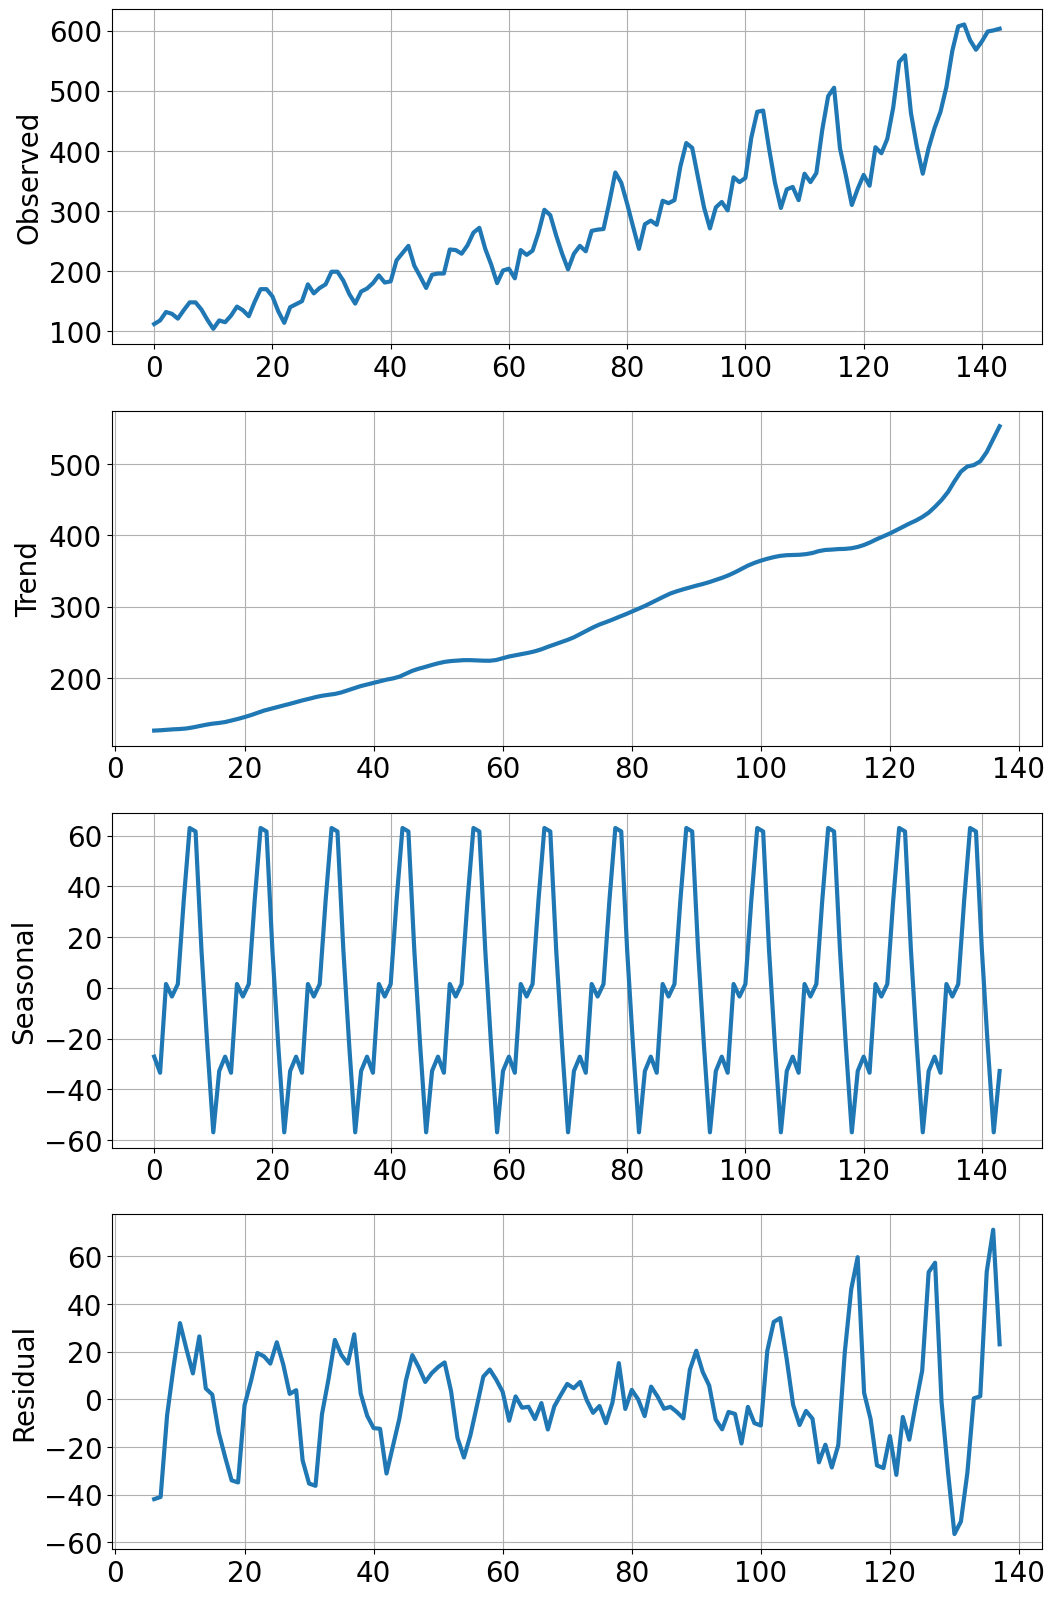

In [43]:
decomposition = seasonal_decompose(new_predict, period=12)
plot_decompose(decomposition)